<a href="https://colab.research.google.com/github/zhili2000/Python/blob/master/%5BModern_Crypto_2023%5D_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Question 6 [4 pt]: Exercise 4.11: experimental birthday probabilities**

Write a program that experimentally estimates the BirthdayProb(q, N) probabilities.
Given q and N , generate q uniformly chosen samples from $\mathbb{Z}_N$ , with replacement, and check whether
any element was chosen more than once. Repeat this entire process t times to estimate the true probability of BirthdayProb(q, N ). Generate a plot that compares your experimental findings to the theoretical
upper/lower bounds of $0.632 \frac{q(q−1)}{2N}$ and $\frac{q(q−1)}{2N}$.

# Solution:
The program that experimentally estimates the BirthdayProb(q,N) probabilities could be written as follows:

In [20]:
import numpy as np

def birthday_prob(q, N, t):
    # Store the results of whether any element was chosen more
    # than once in this array. 1 indicates duplicates, 0 otherwise.
    results = np.zeros(t)

    # Repeat the process t times.
    for i in range(0, t):
        # Generate q uniformly chosen samples from Z_n.
        samples = np.random.randint(0, N, size=q)
        # Get the array of unique values in samples.
        unique_val = np.unique(samples)

        # If the number of unique values is smaller than the size
        # of samples, it means that some elements have occurred more
        # than once.
        if samples.size > unique_val.size:
            results[i] = 1

    # Get the probability.
    return np.count_nonzero(results) / results.size

def lower_bound(q, N):
    return 0.632 * q * (q - 1) / (2 * N)

def upper_bound(q, N):
    return q * (q - 1) / (2 * N)

Then we can generate a plot that compares the experimental findings to the theoretical upper/lower bounds of $0.632\frac{q(q−1)}{2N}$ and $\frac{q(q−1)}{2N}$.

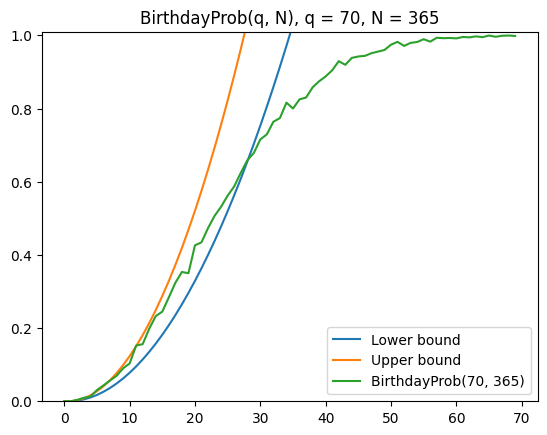

In [45]:
from functools import update_wrapper
from numpy._typing import NBitBase
import matplotlib.pyplot as plt

N = 365
q = 70

# Repeat birthday_prob() 2000 times for every q in
# order to get more accurate results.
t = 1800

lower_x = np.arange(0, q)
lower_y = np.zeros(q)
upper_x = np.arange(0, q)
upper_y = np.zeros(q)
est_x = np.arange(0, q)
est_y = np.zeros(q)

for i in range(q):
    lower_y[i] = lower_bound(i, N)
    upper_y[i] = upper_bound(i, N)
    est_y[i] = birthday_prob(i, N, t)

plt.title('BirthdayProb(q, N), q = 70, N = 365')
plt.ylim(top=1.01, bottom=0)
plt.plot(lower_x, lower_y, label='Lower bound')
plt.plot(upper_x, upper_y, label='Upper bound')
plt.plot(est_x, est_y, label='BirthdayProb(70, 365)')
plt.legend()
plt.show()

We see that the BirthdayProb(q, N) stays within the upper and lower bounds when q is relatively small compared to N.